In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import os
import matplotlib.ticker as ticker

# Make figures have reasonable quality
matplotlib.rcParams['figure.dpi'] = 150 

# Read the CSV file
data_csv = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

print("Rows: ", data_csv.shape[0], " Columns: " ,data_csv.shape[1])


C:\Users\Admin\AppData\Local\Temp\ipykernel_21140\3169983289.py:13: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


Rows:  7461195  Columns:  13


In [3]:
data = data_csv.dropna()

# rename the column to distance
data = data.rename(columns={'Event distance/length': 'distance'})

In [4]:
# remove the rows that contain any of the remove strings
remove = ['h', 'Etappen', 'le', 'd',',','stages', '\+', 'NaN', 'NA', 'test', 'Split', 'x', 'Etap']
data = data[~data['distance'].str.contains('|'.join(remove))]

In [5]:
def miles_to_km(distance):
    return int(round(float(distance.replace('mi', '')) * 1.609344, 0))

def convert_distance_to_km(distance):
    if 'mi' in distance:
        return miles_to_km(distance)
    elif 'km' in distance:
        return int(round(float(distance.replace('km', '').strip()), 0))
    else:
        return 

# Convert distances to kilometers
data['distance'] = [convert_distance_to_km(dist) for dist in data['distance']]

# remove nan values in distance
data = data.dropna(subset=['distance'])

# change data type of distance to int array
data['distance'] = data['distance'].astype(int)


In [6]:
def convert_speed_to_float(speed):
    try: 
        if (float(speed) > 1000):
            return speed / 1000
        else:
            return speed
    except:
        return np.nan

# round the average speed to 2 decimal places
data['Athlete average speed'] = [convert_speed_to_float(speed) for speed in data['Athlete average speed']]

# remove nan values in Athlete average speed
data = data.dropna(subset=['Athlete average speed'])

# change data type of Athlete average speed to float array
data['Athlete average speed'] = data['Athlete average speed'].astype(float)

print(data['Athlete average speed'].describe())

count    4.060212e+06
mean     7.651668e+00
std      2.124512e+00
min      0.000000e+00
25%      6.116000e+00
50%      7.552000e+00
75%      8.942000e+00
max      4.979300e+01
Name: Athlete average speed, dtype: float64


In [7]:
# Display Information About Column 

# print(data['Year of event'].unique())

# print(data['Event dates'].unique())

# print(data['Athlete gender'].unique())

# print(data['Athlete country'].unique())

# print(data['Athlete average speed'].unique())

# print(data['Event number of finishers'].unique())

# print(data['Athlete year of birth'].unique())

# print(data['Athlete age category'].unique())

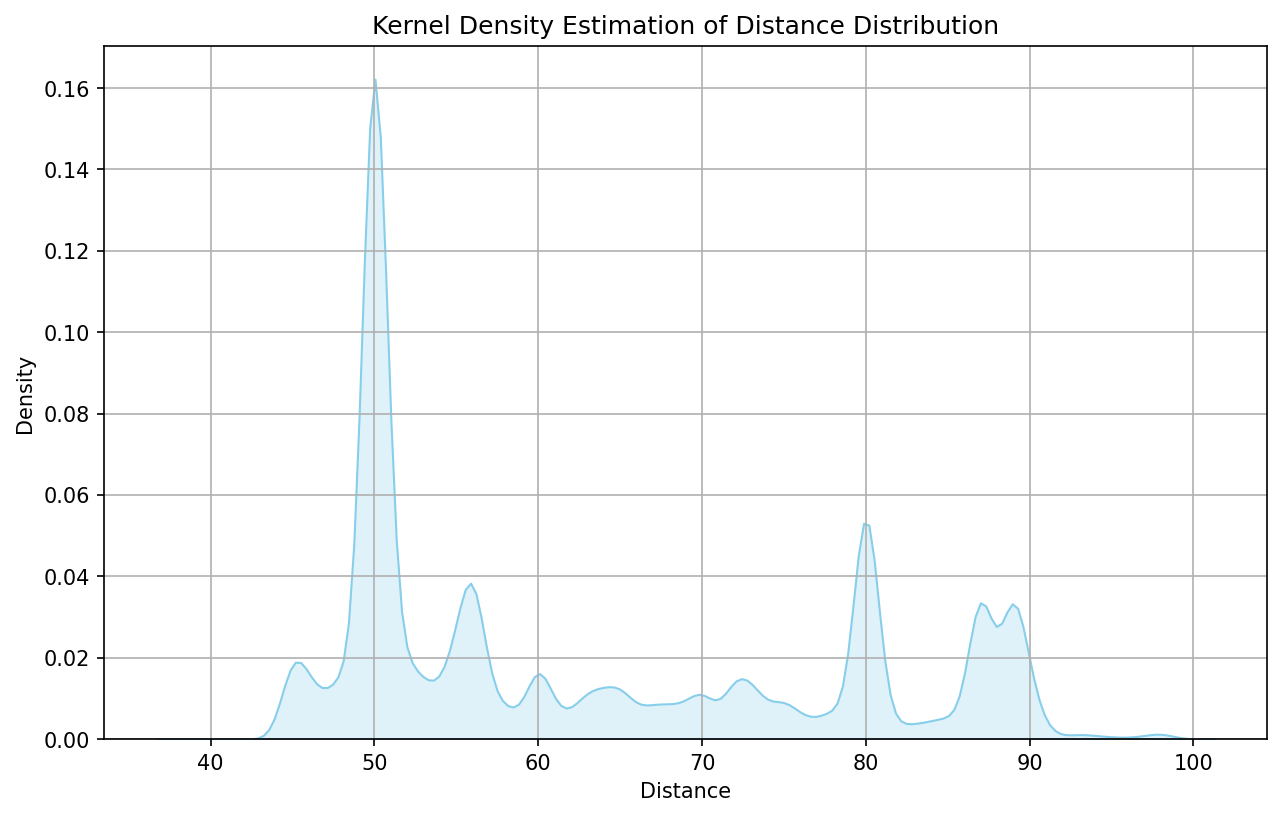

In [8]:
# Race Distance Distribution

filtered_data = data[data['distance'] < 100]
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['distance'], color='skyblue', fill=True)
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Distance Distribution')
plt.grid(True)
plt.show()


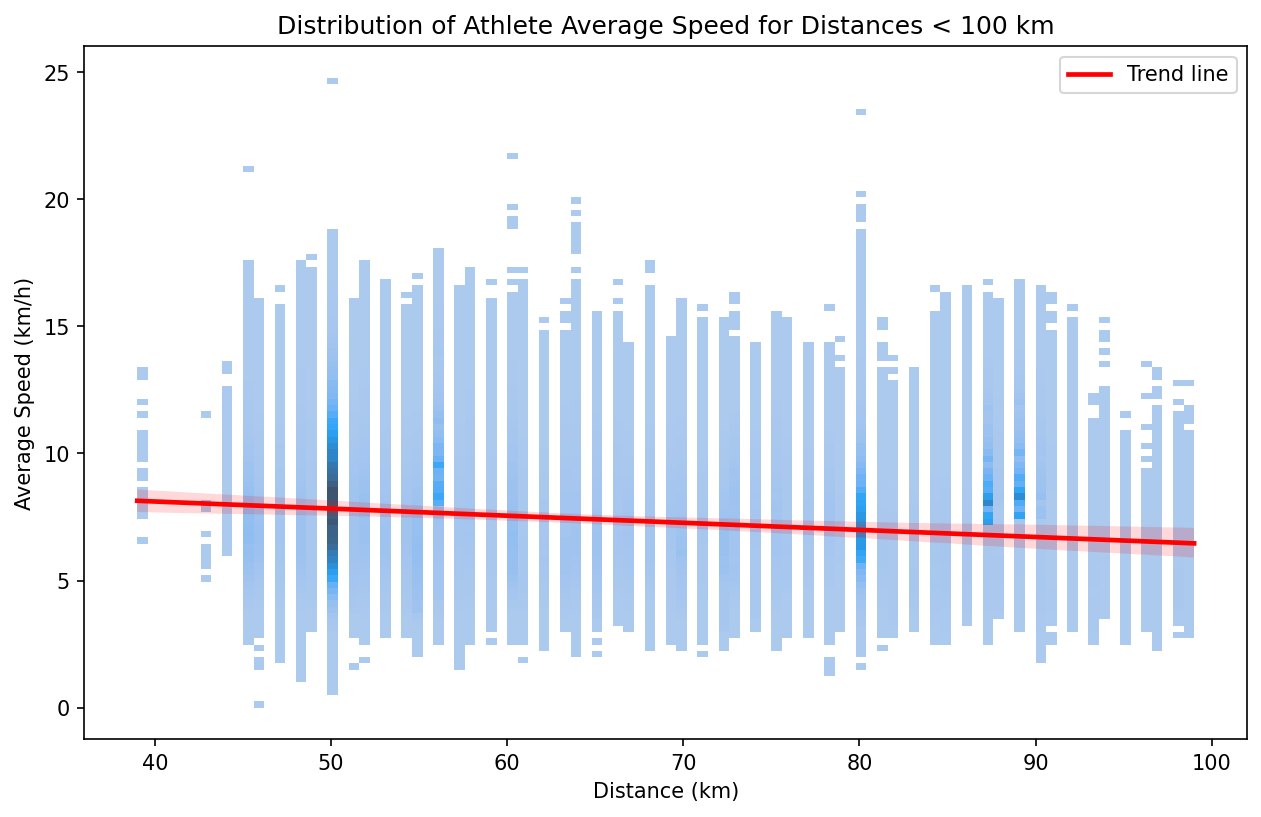

In [9]:
# Assuming you have 'data' DataFrame with columns 'distance' and 'Athlete average speed'

# Filter for distances less than 100 km
filtered_data = data[data['distance'] < 100]

# Filter for average speeds less than 40 km/h
filtered_data = filtered_data[filtered_data['Athlete average speed'] < 40]

# Calculate average speed for each distance bin
average_speeds = filtered_data.groupby('distance')['Athlete average speed'].mean().reset_index()

# Plot histogram of athlete average speed for distances less than 100 km
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='distance', y='Athlete average speed', bins=100, kde=True)

# Add trend line
sns.regplot(data=average_speeds, x='distance', y='Athlete average speed', scatter=False, color='red', label='Trend line')

plt.title('Distribution of Athlete Average Speed for Distances < 100 km')
plt.xlabel('Distance (km)')
plt.ylabel('Average Speed (km/h)')
plt.legend()
plt.show()


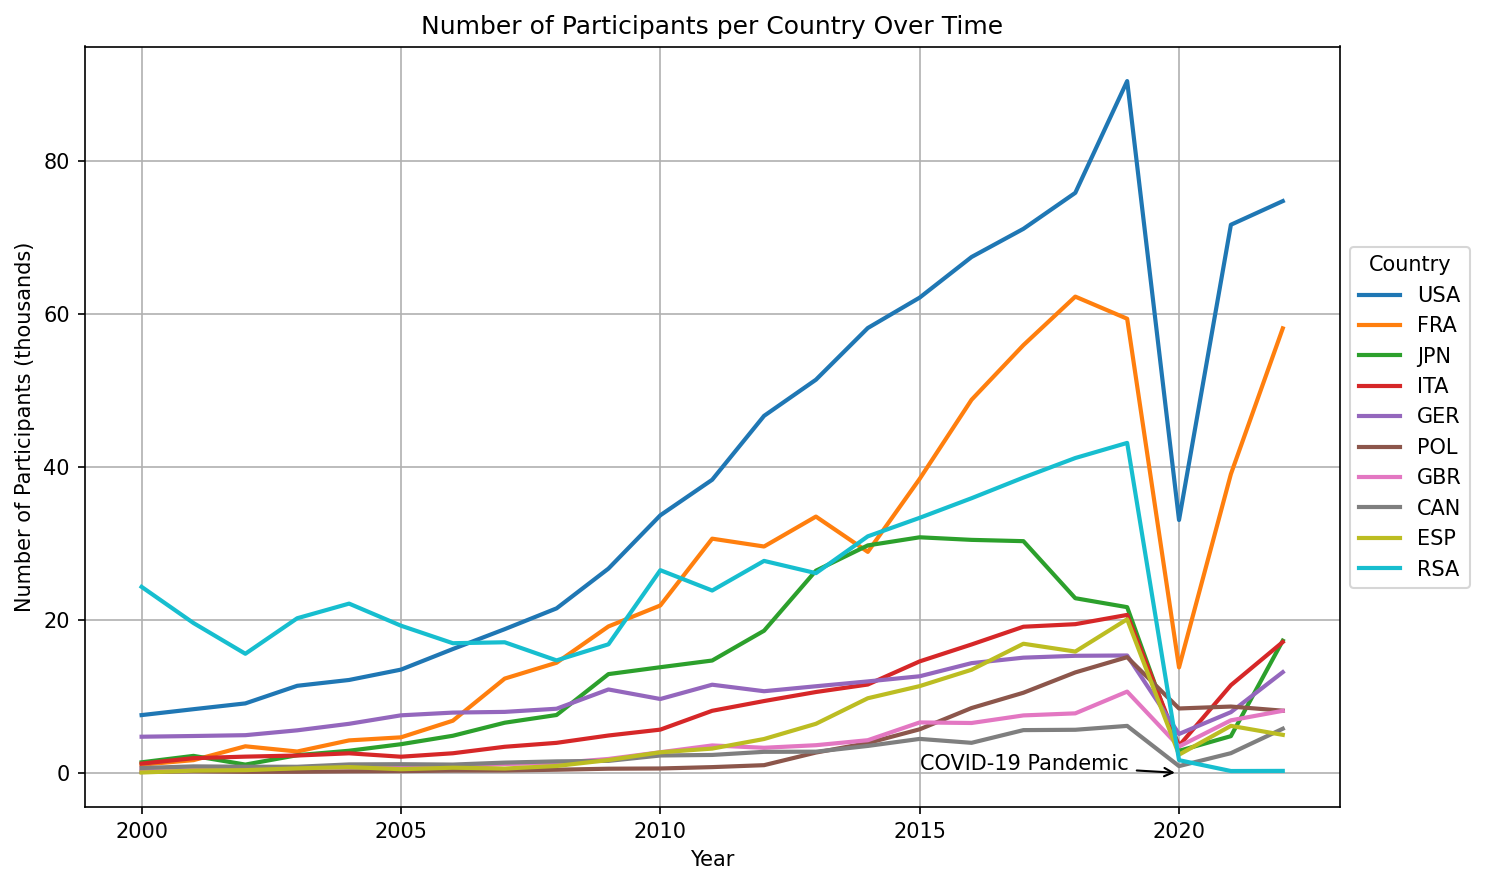

In [65]:

# Number of Participants per Country Over Time
# For the countries with the most total participants all time (top 10)

# filter data for 2000 to 2022
filtered_data = data[(data['Year of event'] >= 2000) & (data['Year of event'] <= 2022)]

# group by country and then print to file
participants_per_country = filtered_data.groupby(['Athlete country']).size().reset_index(name='Number of Participants')

# get the top 10 countries with the most participants
top_10_countries = participants_per_country.nlargest(10, 'Number of Participants')

# Create a set of distinct colors for each country
colors = sns.color_palette('tab10', n_colors=10)

# Filter for the top 10 countries
filtered_data = filtered_data[filtered_data['Athlete country'].isin(top_10_countries['Athlete country'])]

# Create a set of distinct colors for each country
colors = sns.color_palette('tab10', n_colors=len(filtered_data['Athlete country'].unique()))

# Calculate number of participants per country
participants_per_country = filtered_data.groupby(['Year of event', 'Athlete country'])['Athlete country'].count().unstack()

# Divide values by 1000 for better readability
participants_per_country = participants_per_country / 1000

# get the order of the top 10 countries participation in 2022
top_10_countries_2022 = participants_per_country.loc[2022].sort_values(ascending=False).index

# sort the columns by the order of the top 10 countries participation in 2022
participants_per_country = participants_per_country[top_10_countries_2022]

# Plot number of participants per country over time
plt.figure(figsize=(10, 6))
participants_per_country.plot(kind='line', ax=plt.gca(), linewidth=2, alpha=1, color = colors)
plt.title('Number of Participants per Country Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants (thousands)')
plt.legend(title='Country', bbox_to_anchor=(1, 0.75))
plt.grid(True)
plt.tight_layout()

plt.annotate('COVID-19 Pandemic', xy=(2020, 0), xytext=(2015, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.show()



[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (1.0, 0.4980392156862745, 0.054901960784313725), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]


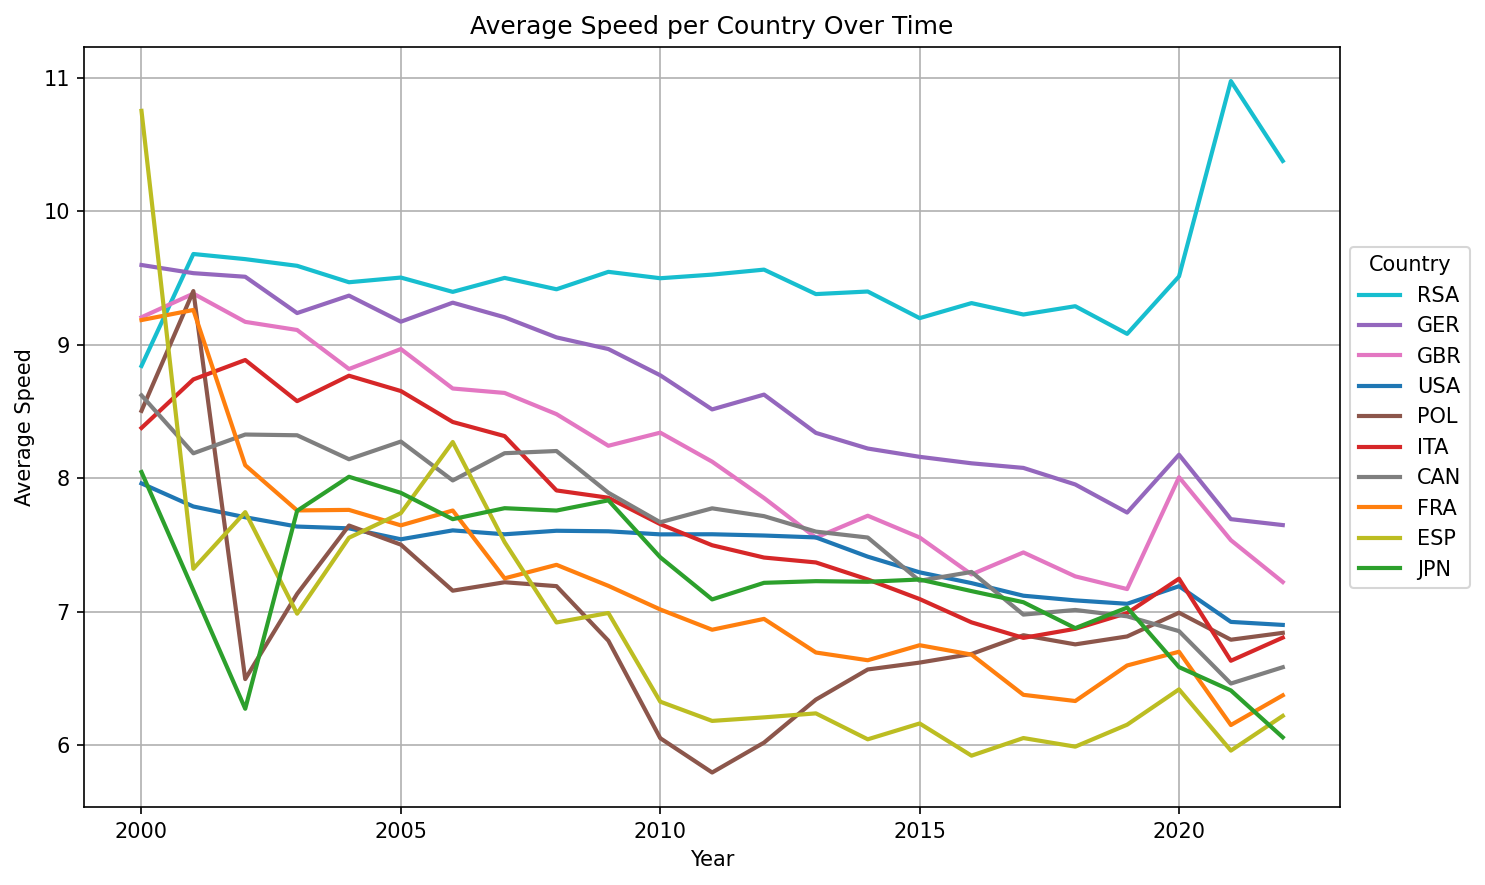

In [66]:

# Calculate average speed per country
average_speed_per_country = filtered_data.groupby(['Year of event', 'Athlete country'])['Athlete average speed'].mean().unstack()

# get the order of the top 10 countries average speed in 2022
top_10_countries_2022_speed = average_speed_per_country.loc[2022].sort_values(ascending=False).index

# sort the columns by the order of the top 10 countries average speed in 2022
average_speed_per_country = average_speed_per_country[top_10_countries_2022_speed]

# sort the colours appropriately from the previous graph
new_colors = [];
for country in average_speed_per_country.columns:
    # get the position of the country in the top 10 countries participation in 2022
    position = np.where(top_10_countries_2022 == country)[0][0]
    # get the color of the country
    color = colors[position]
    new_colors.append(color)


# Plot average speed per country over time
plt.figure(figsize=(10, 6))
average_speed_per_country.plot(kind='line', ax=plt.gca(), linewidth=2, alpha=1, color = new_colors)
plt.title('Average Speed per Country Over Time')
plt.xlabel('Year')
plt.ylabel('Average Speed')
plt.legend(title='Country', bbox_to_anchor=(1, 0.75))
plt.grid(True)
plt.tight_layout()
plt.show()

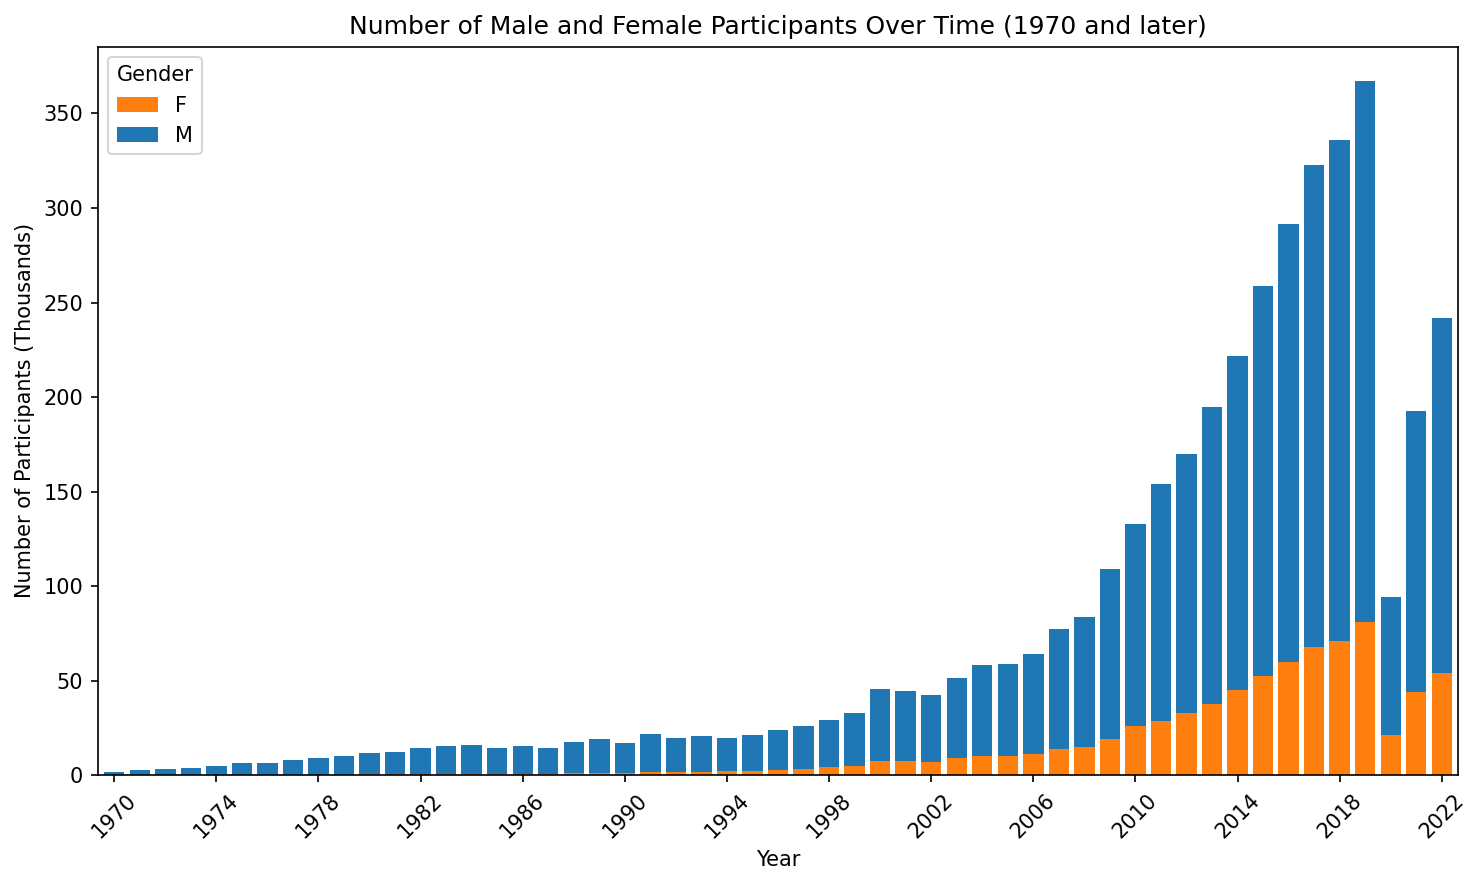

In [11]:
# Define colors for the bars
colors = ['#ff7f0e','#1f77b4']

# Number of Male and Female Participants Over Time

# Group the data by year and gender, and count the number of participants
gender_counts = data.groupby(['Year of event', 'Athlete gender']).size().unstack(fill_value=0)

# Filter the data for the years 1950 and later
gender_counts = gender_counts[gender_counts.index >= 1970]

# Deivide the male counts by 1000
gender_counts['M'] = gender_counts['M'] / 1000

# Divide the female counts by 1000
gender_counts['F'] = gender_counts['F'] / 1000

# Plot the data
ax = gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, width = 0.8)

# Customize the plot
plt.title('Number of Male and Female Participants Over Time (1970 and later)')
plt.xlabel('Year')
plt.ylabel('Number of Participants (Thousands)')
plt.legend(title='Gender')

# Set the tick frequency on the x-axis to display every nth year
n = 4  # Set the interval for every nth year
ax.xaxis.set_major_locator(ticker.MultipleLocator(n))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

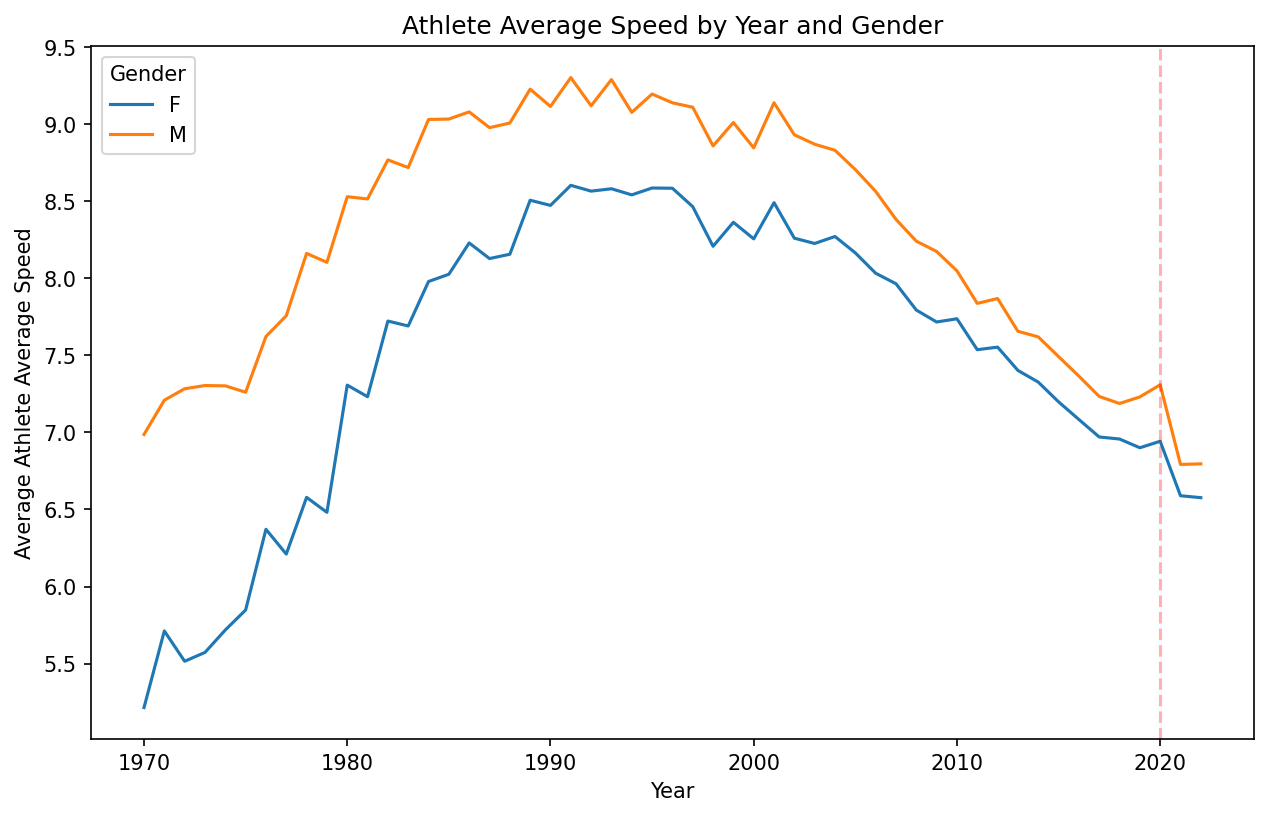

In [41]:


# Group the data by year and gender, and calculate the mean of 'Athlete average speed'
average_speeds_year_gender = data.groupby(['Year of event', 'Athlete gender'])['Athlete average speed'].mean().reset_index()

# Filter the data for the years 1950 and later
average_speeds_year_gender = average_speeds_year_gender[average_speeds_year_gender['Year of event'] >= 1970]

# Plot the average 'Athlete average speed' for each year for both males and females
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_speeds_year_gender, x='Year of event', y='Athlete average speed', hue='Athlete gender')
plt.title("Athlete Average Speed by Year and Gender")
plt.xlabel("Year")
plt.ylabel("Average Athlete Average Speed")
plt.legend(title="Gender")

# Add annotation line to year 2000
plt.axvline(x=2020, color='red', alpha= 0.3, linestyle='--', label='Covid-19 Pandemic')


plt.show()


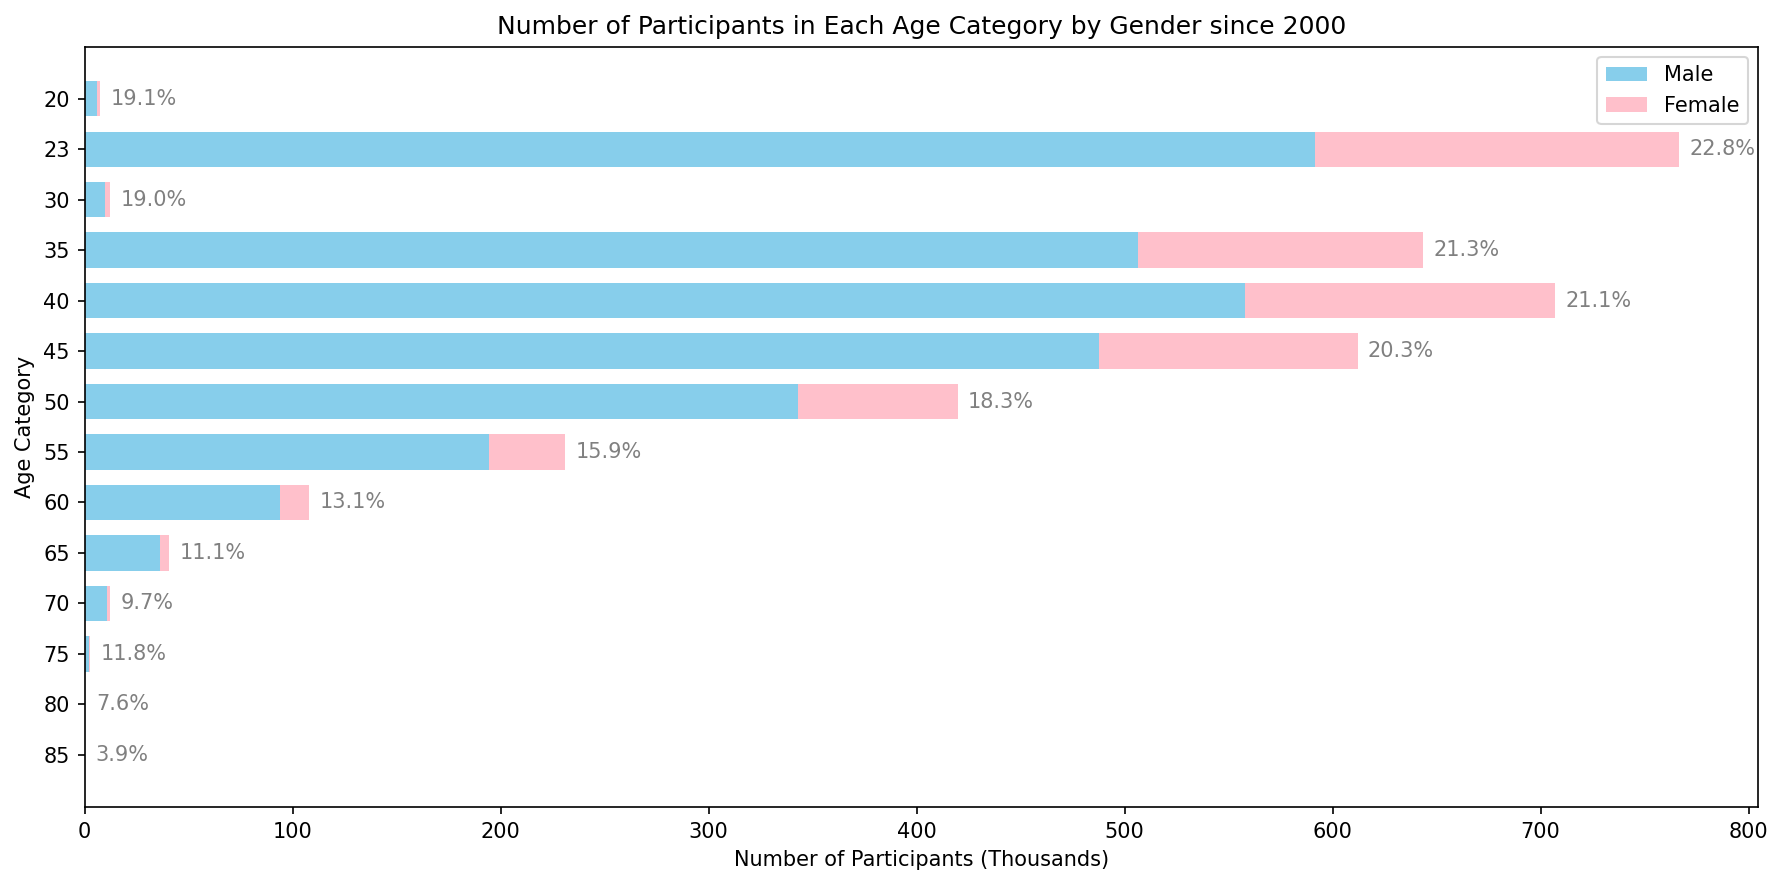

In [67]:

# first filter for data after 2000
filtered_data = data[data['Year of event'] >= 2000]

# and 'age_categories' contains unique age categories
age_categories = filtered_data['Athlete age category'].unique()
age_counts = filtered_data.groupby('Athlete age category').size().sort_values(ascending=False)

# divide age_counts by 1000
age_counts = age_counts / 1000

# Splitting categories into male and female
male_categories = [cat for cat in age_categories if cat.startswith('M')]
female_categories = [cat for cat in age_categories if cat.startswith('W')]

# Extracting only the numbers from the strings in both lists
nums_list1 = [int(x[1:]) for x in male_categories if x[1:].isdigit()]
nums_list2 = [int(x[1:]) for x in female_categories if x[1:].isdigit()]

# Finding the common numbers between the two lists
common_numbers = set(nums_list1).intersection(nums_list2)

# sort the common numbers
common_numbers = sorted(list(common_numbers))

# Creating new lists containing only the common numbers
male_categories = ['M' + str(num) for num in common_numbers]
female_categories = ['W' + str(num) for num in common_numbers]

# Data for male and female categories
male_participants = [age_counts[cat] for cat in male_categories]
female_participants = [age_counts[cat] for cat in female_categories]

# Width of the bars
width = 0.7

x = np.arange(len(common_numbers))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(x, male_participants, width, label='Male', color='skyblue')
plt.barh(x, female_participants, width, left=male_participants, label='Female', color='pink')

# Calculate the total number of participants
total_participants = [m + f for m, f in zip(male_participants, female_participants)]

# Add percentage labels
for i in range(len(x)):
    female_percentage = female_participants[i] / total_participants[i] * 100
    plt.text(male_participants[i] + female_participants[i] + 5, x[i], f'{female_percentage:.1f}%', ha='left', va='center', color='grey')


plt.ylabel('Age Category')
plt.xlabel('Number of Participants (Thousands)')
plt.title('Number of Participants in Each Age Category by Gender since 2000')
plt.yticks(ticks=x, labels=common_numbers)
plt.legend()
plt.tight_layout()

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_21140\1018496685.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_50k = data_50k[data['Athlete average speed'] < 20]


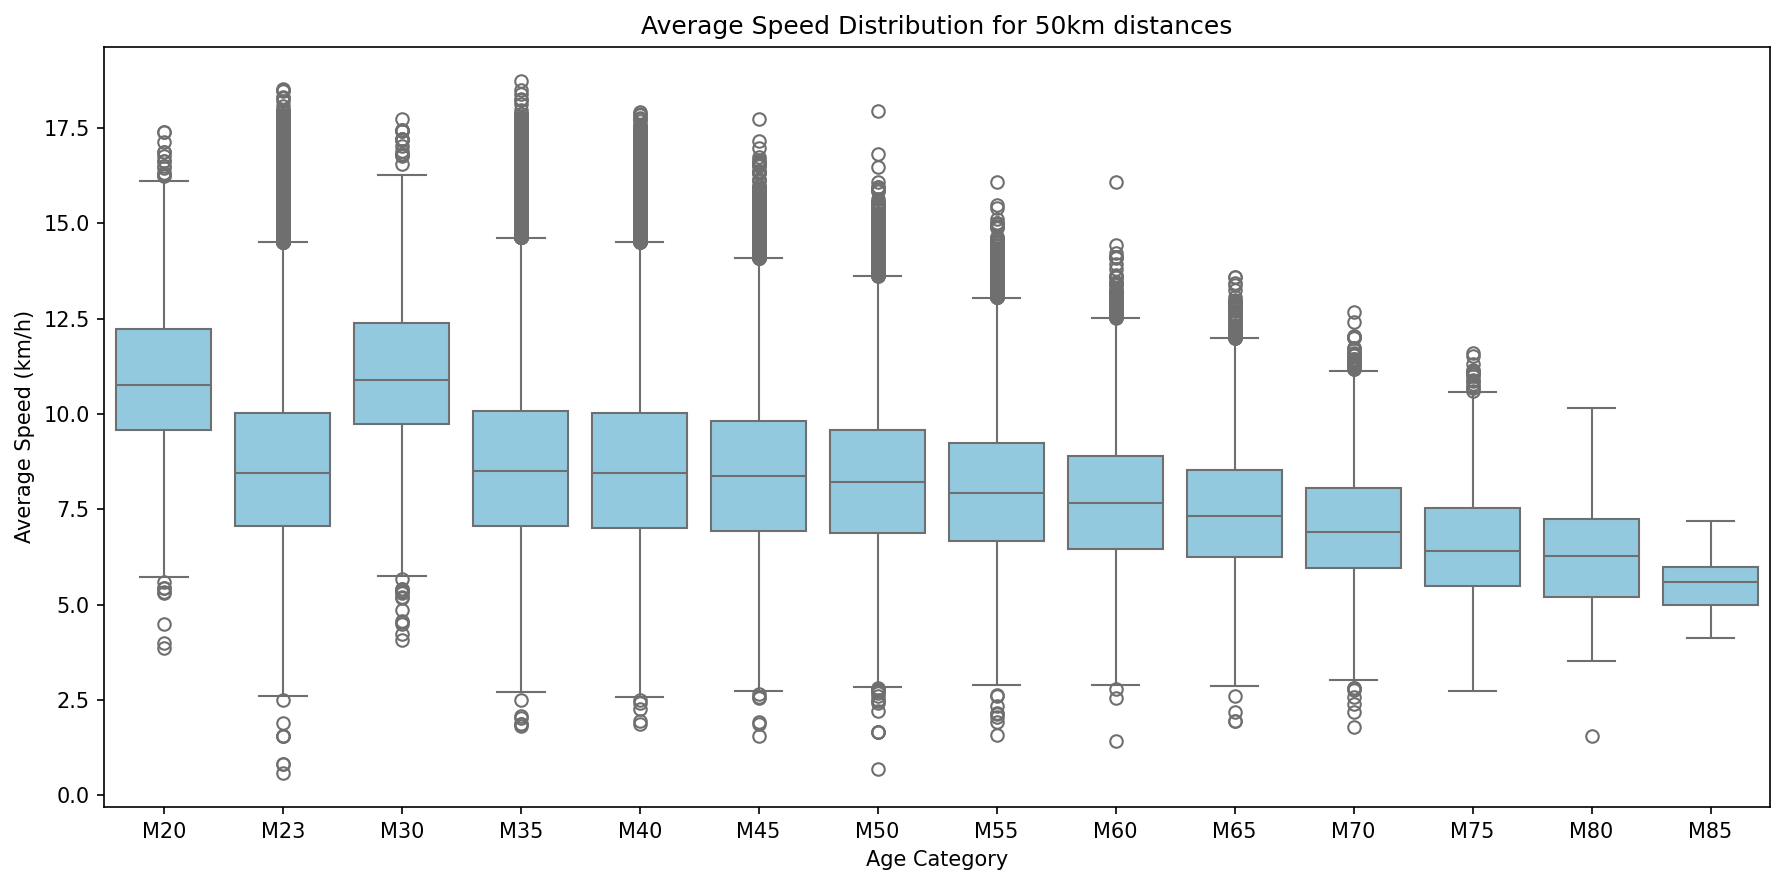

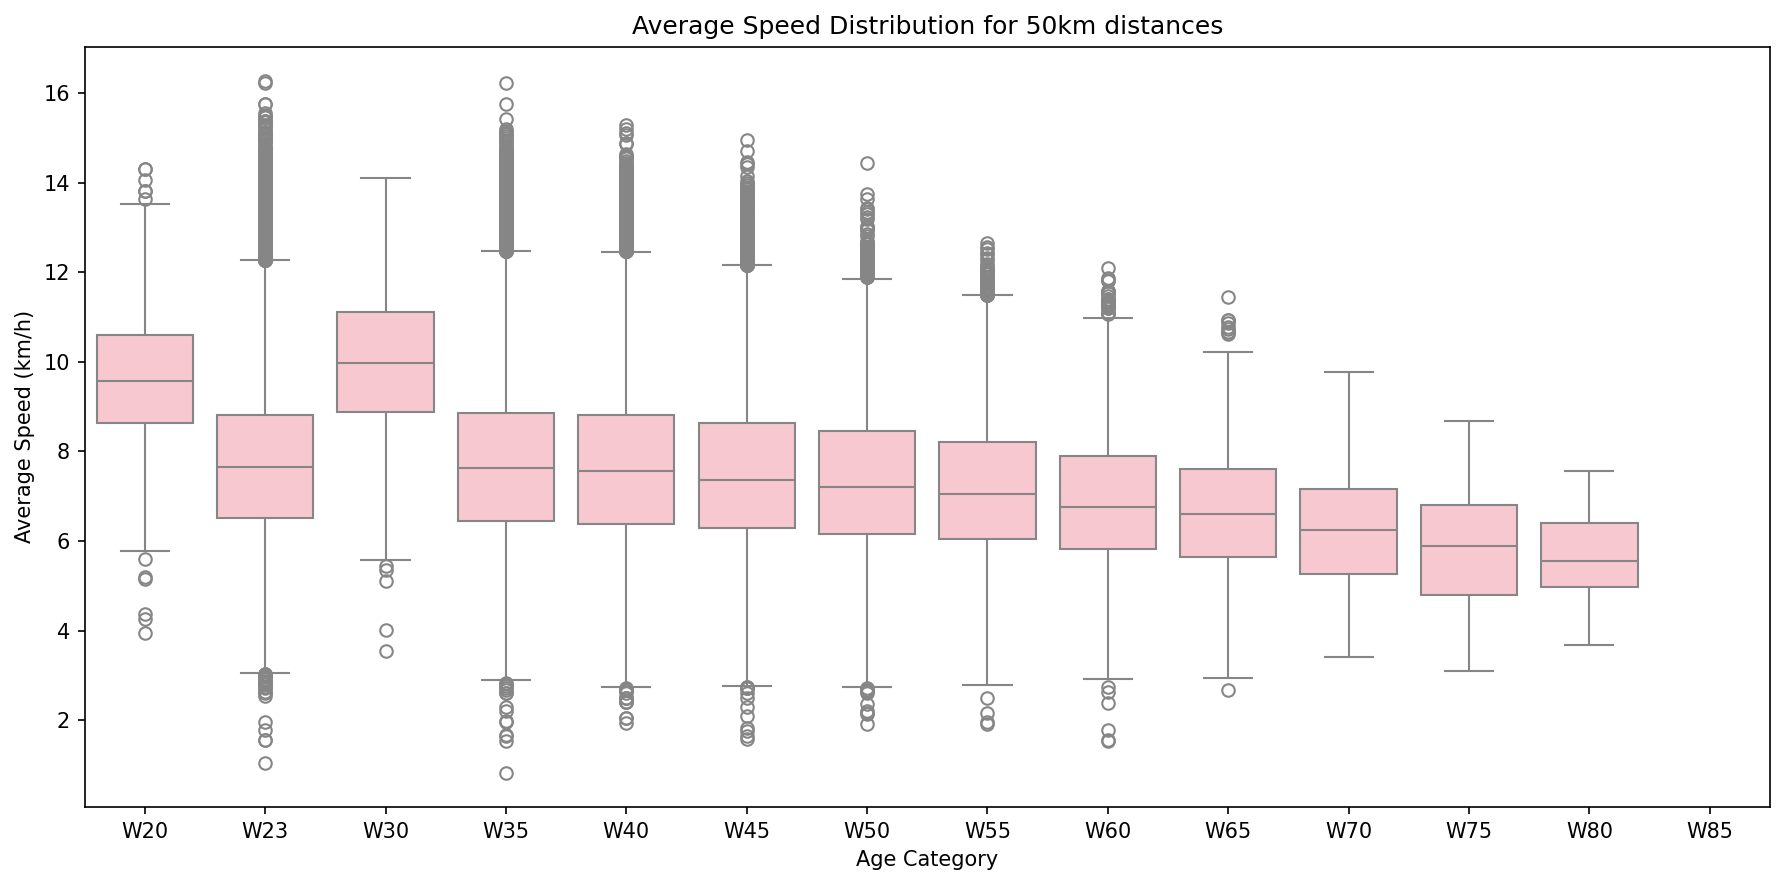

In [14]:
# male_categories = ['M23', 'M24', 'M25']
# female_categories ['W23', 'W24', 'W25']
# common_numbers = [23, 24, 25]

data_50k = data[data['distance'] == 50]
# data_80k = data[data['distance'] == 80]

data_50k = data_50k[data['Athlete average speed'] < 20]

data_50k_2000 = data_50k[data_50k['Year of event'] >= 2000]
# data_80k_2000 = data_80k[data_80k['Year of event'] >= 2000]

# Filter for ages in male_categories
data_50k_2000_age_male = data_50k_2000[data_50k_2000['Athlete age category'].isin(male_categories)]
data_50k_2000_age_female = data_50k_2000[data_50k_2000['Athlete age category'].isin(female_categories)]

# data_80k_2000_age_male = data_80k_2000[data_80k_2000['Athlete age category'].isin(male_categories)]
# data_80k_2000_age_female = data_80k_2000[data_80k_2000['Athlete age category'].isin(female_categories)]

# Combine male and female data
data_50k_2000_age = pd.concat([data_50k_2000_age_male.assign(Gender='Male'),
                               data_50k_2000_age_female.assign(Gender='Female')])



plt.figure(figsize=(12, 6))
sns.boxplot(data=data_50k_2000_age_male, x='Athlete age category', y='Athlete average speed', color='skyblue', order=male_categories)
plt.title('Average Speed Distribution for 50km distances')
plt.xlabel('Age Category')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_50k_2000_age_female, x='Athlete age category', y='Athlete average speed', color='pink', order=female_categories)
plt.title('Average Speed Distribution for 50km distances')
plt.xlabel('Age Category')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





['01' '03' '02' '05' '04' '06' '08' '07' '09' '10' '12' '11' '00']


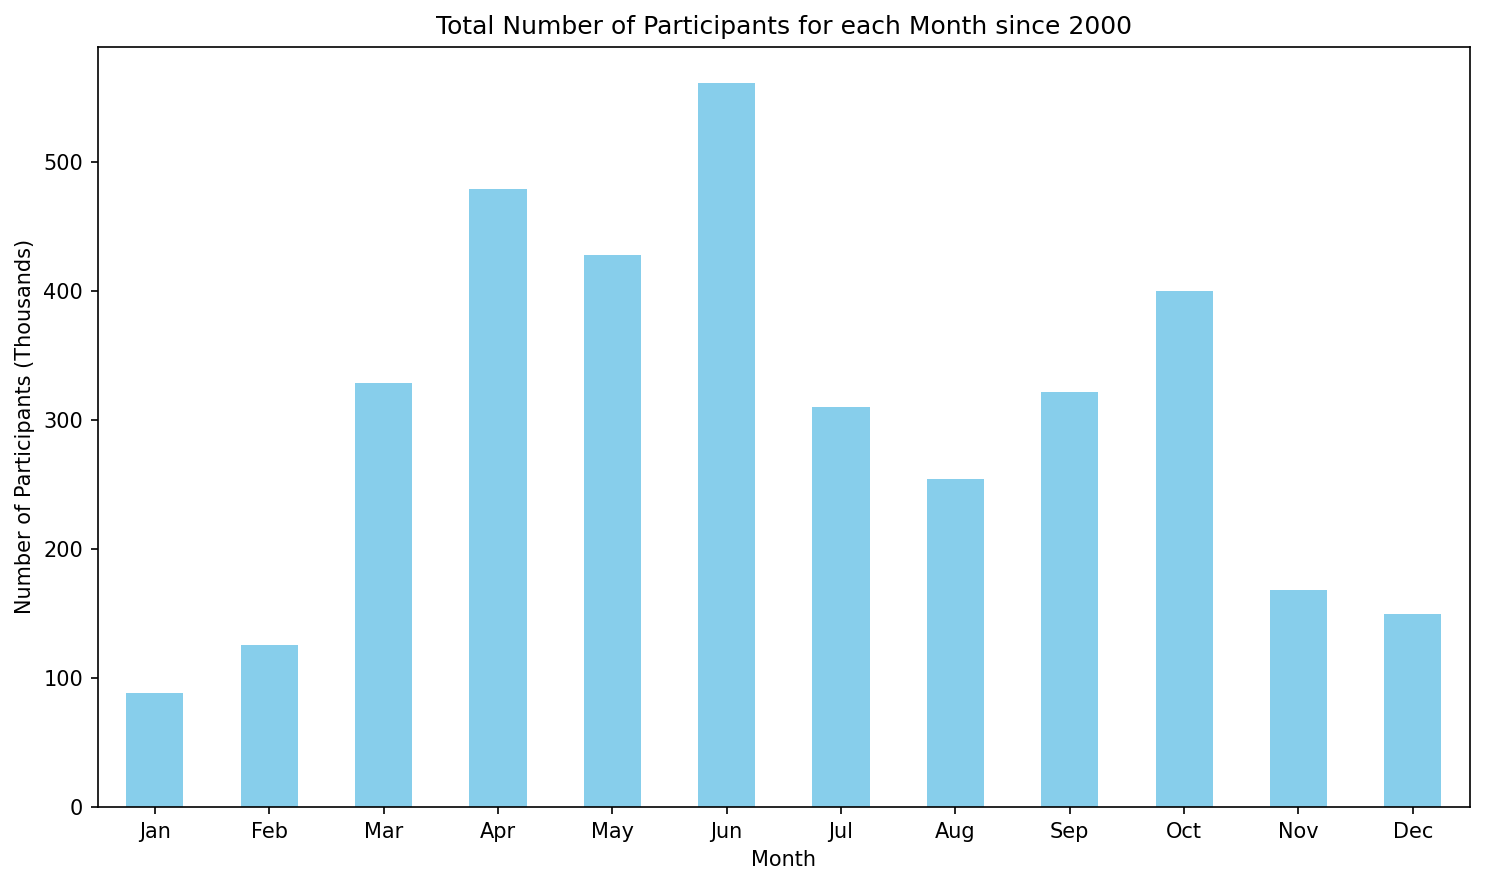

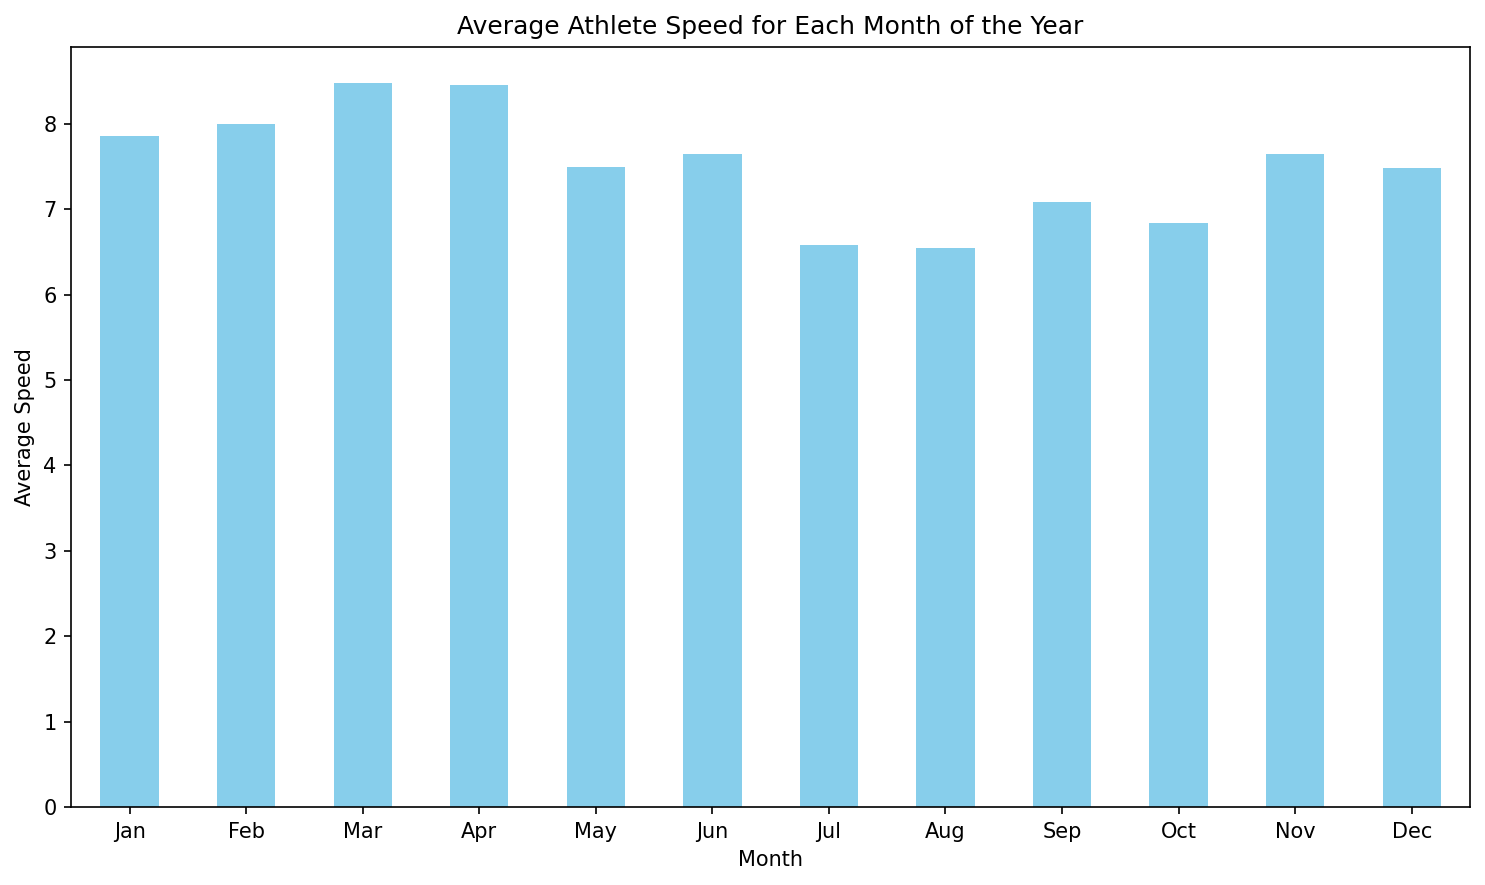

In [68]:

# the above code will not work as the split function is not available for the series
# so we need to use the apply function
# if the month has a negative then use the 2nd index else use the 1st index
def get_month(date):
    if '-' in date:
        return date.split('-')[1].split('.')[1]
    else:
        return date.split('.')[1]

# apply the function to the column
data['Month'] = data['Event dates'].apply(get_month)

print(data['Month'].unique())

# Create a dictionary that maps month numbers to names
month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', 
              '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

# Replace the month numbers with their names in the 'Month' column
data['Month'] = data['Month'].map(month_dict)

# Filter the data for the years 2000 and later
filtered_data = data[data['Year of event'] >= 2000]

# Group the data by month and count the number of participants
participants_per_month = filtered_data.groupby('Month').size().reindex(month_dict.values())

# Divide the number of participants by 1000
participants_per_month = participants_per_month / 1000

# Plot the number of participants per month
plt.figure(figsize=(10, 6))
participants_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Number of Participants for each Month since 2000')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Number of Participants (Thousands)')
plt.tight_layout()
plt.show()


# Calculate average speed per month
average_speed_per_month = filtered_data.groupby('Month')['Athlete average speed'].mean().reindex(month_dict.values())

# Plot average speed per month
plt.figure(figsize=(10, 6))
average_speed_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Athlete Speed for Each Month of the Year')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Average Speed')
plt.tight_layout()
plt.show()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2340 rows x 0 columns]


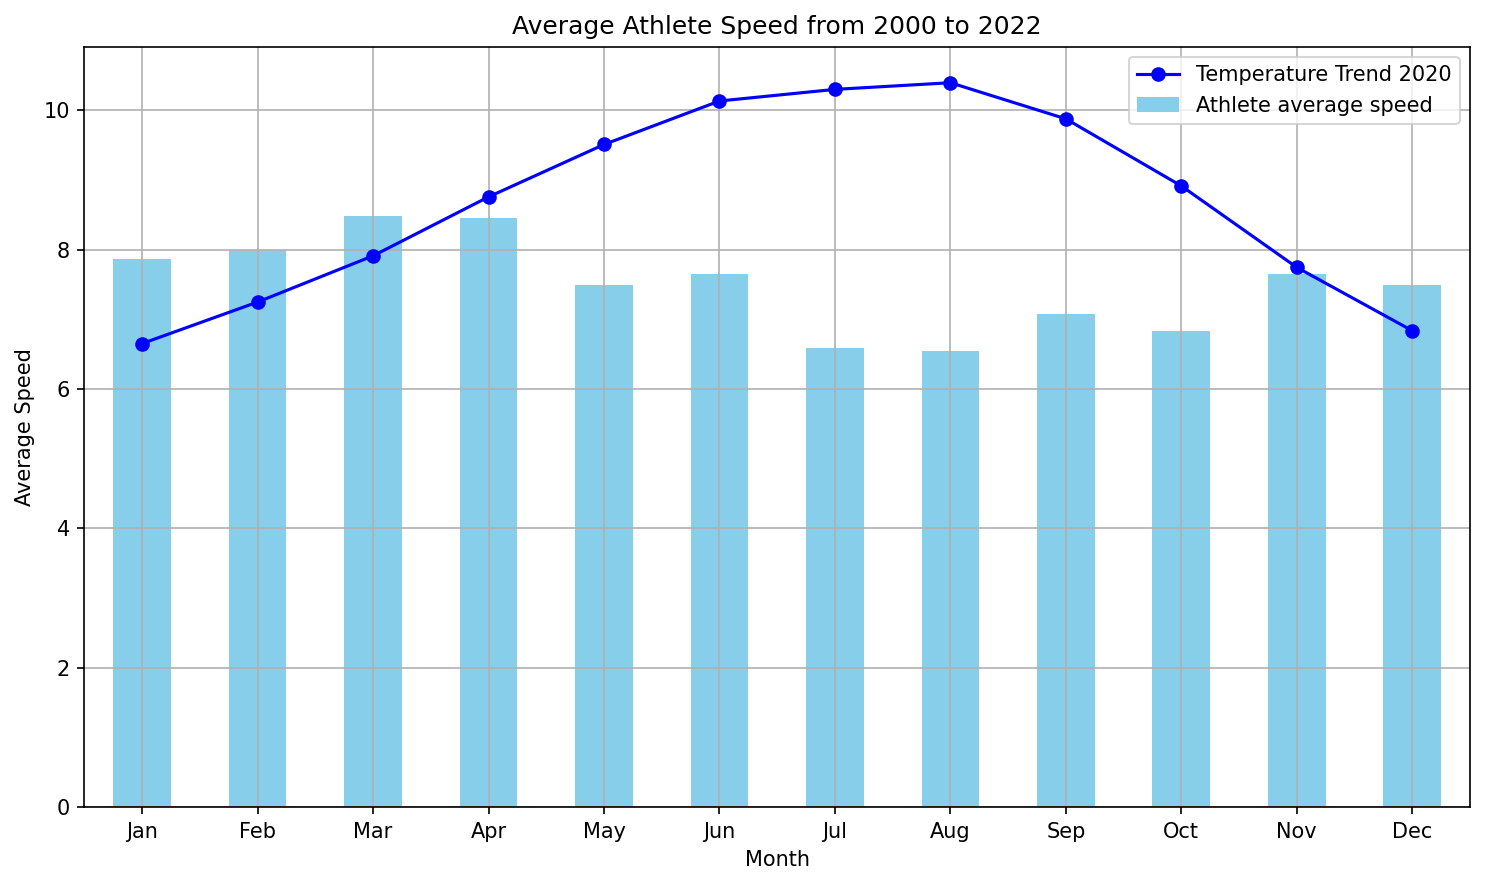

In [92]:
# Read the CSV file into a DataFrame
df = pd.read_csv('montly.csv')

# Assume you have already calculated average_speed_per_month and month_dict

# Plot average speed per month
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes

average_speed_per_month.plot(kind='bar', color='skyblue', ax=ax)  # Plot bar graph


# Plot the average temperature for each month
temp_data = df['2020']
average_temp = []
interval = 12
length = round(len(temp_data) / interval)

for i in range(0, interval):
    sum = 0
    for j in range(0, length):
        temp = temp_data[j * interval + i]
        sum += temp
    average_temp.append(sum / length / 2.2)

ax.plot(average_temp, marker='o', color='b', linestyle='-', label='Temperature Trend 2020')  # Plot line graph on the same axes

# Customize the plot
plt.title('Average Athlete Speed from 2000 to 2022')
plt.xlabel('Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Average Speed')
plt.grid(True)
plt.legend()  # Add legend
plt.tight_layout()
plt.show()

